In [11]:
#import cv2
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.33, 
    rescale=1./255 ,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True
)
train_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='training'
     )


val_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web', 
    target_size=(224, 224),
    shuffle=True,
    batch_size=32,
    subset='validation'
    )

Found 13919 images belonging to 10 classes.
Found 6850 images belonging to 10 classes.


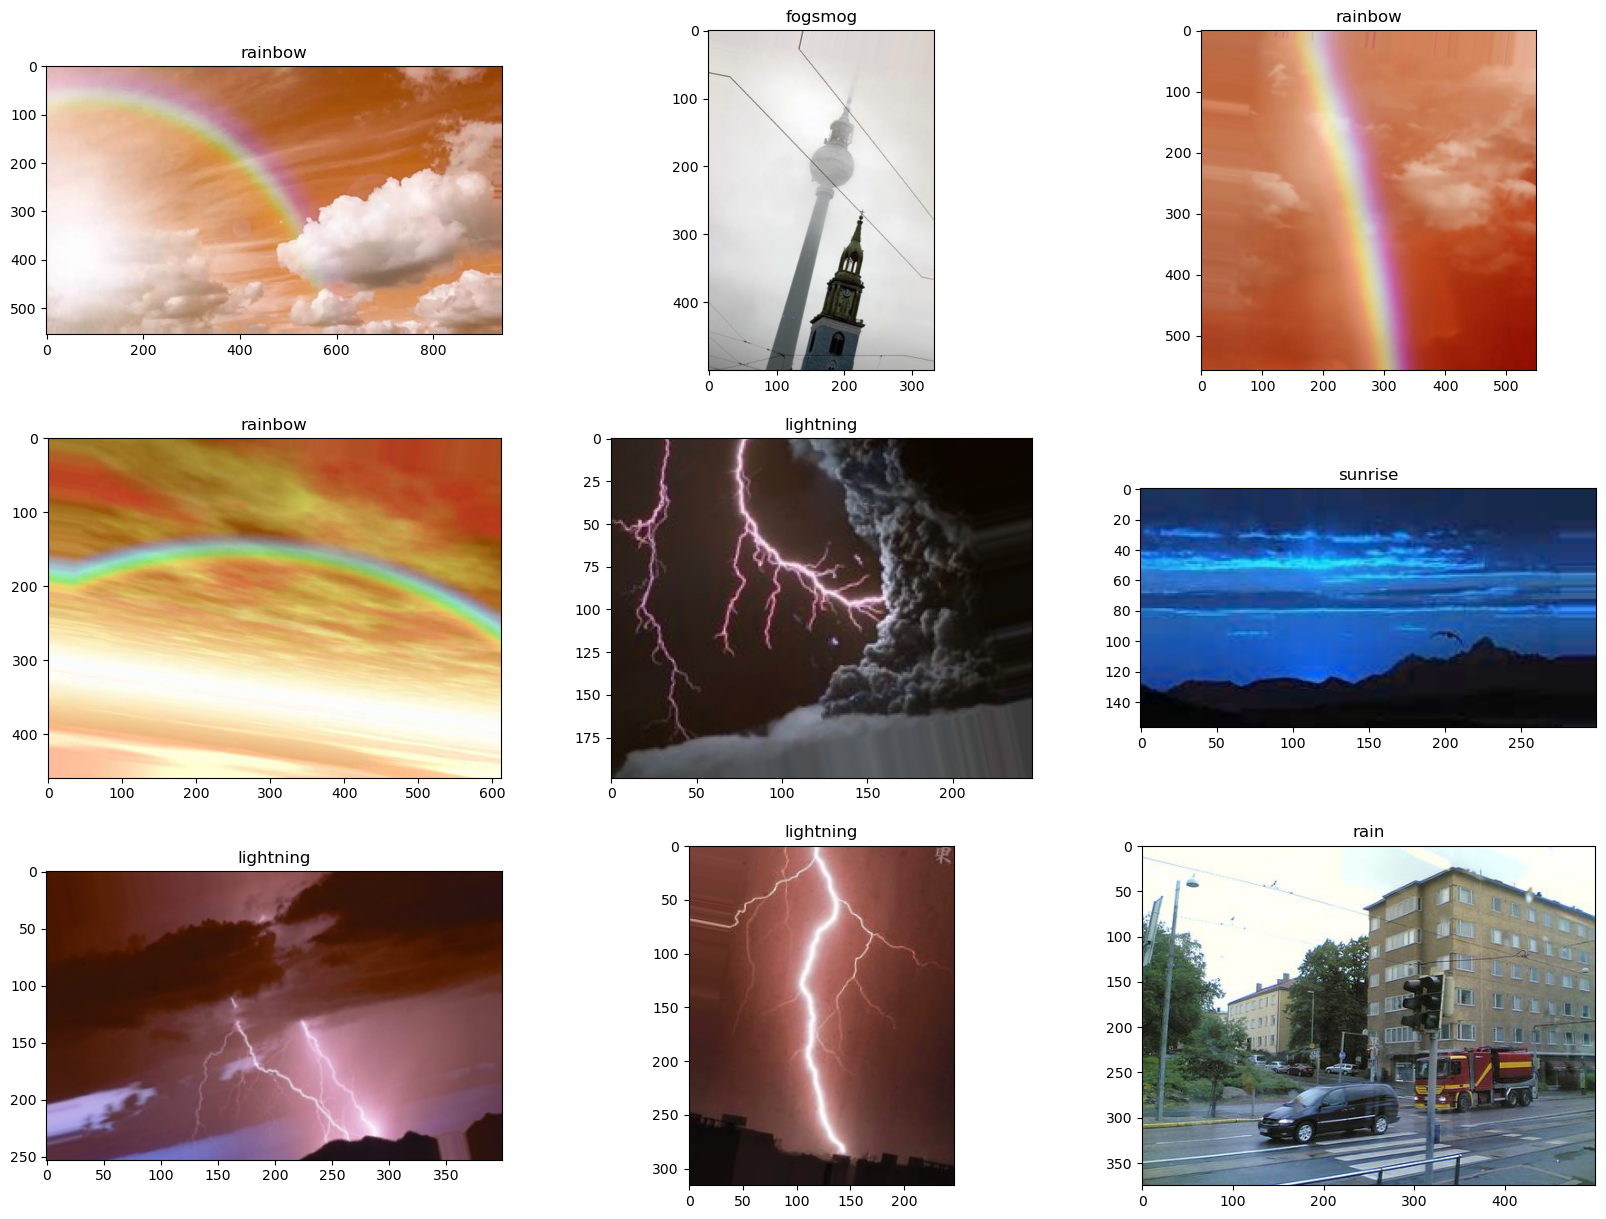

In [13]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [14]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [15]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
IMG_SHAPE = (224, 224, 3)
base_model =tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_shape=IMG_SHAPE,
    pooling=None,
    classifier_activation="softmax",
)

base_model.trainable = False

In [16]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
)
model = Sequential([
    base_model,
    layers.Dense(224, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer=adam_optimizer,
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1000)              143667240 
                                                                 
 dense_6 (Dense)             (None, 224)               224224    
                                                                 
 dropout_4 (Dropout)         (None, 224)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               28800     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 143,921,554
Trainable params: 254,314
No

In [17]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=10,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                             min_delta=0,
                                                             patience=4,
                                                             restore_best_weights=True)])
results = model.evaluate(val_ds)


Epoch 1/10
 15/435 [>.............................] - ETA: 39:29 - loss: 0.6663 - accuracy: 0.0917

KeyboardInterrupt: 

In [ ]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

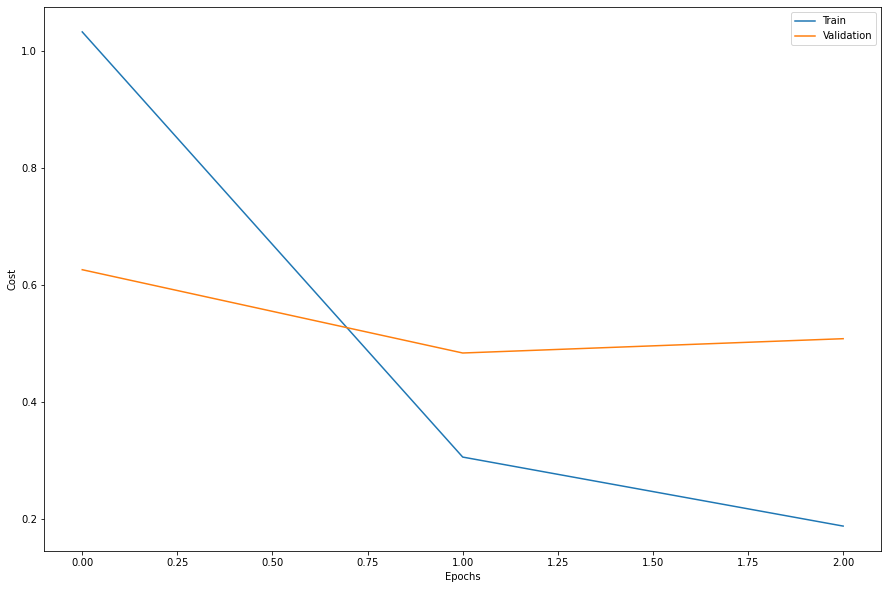

In [ ]:
print_loss(history)

In [ ]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')

In [ ]:
fr'{}норм'